In [1]:
import cv2
import numpy as np
import os
import seaborn as sns
import pandas as pd
from sklearn.utils.class_weight import compute_class_weight

import matplotlib.pyplot as plt

# Load the Dataset

In [2]:
url = "/kaggle/input/isic-2024-challenge/train-image/image"

In [3]:
# Check if there is another format except jpg
num = 0
for i in os.listdir(url):
    path = os.path.join(url,i)
    #print(i.split(".")[-1])
    if i.split(".")[-1] != "jpg":
        num += 1
print(num)

0


In [4]:
df = pd.read_csv("/kaggle/input/isic-2024-challenge/train-metadata.csv")

pd.set_option('display.max_columns', None)
df.head()

/tmp/ipykernel_17/1186481761.py:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/kaggle/input/isic-2024-challenge/train-metadata.csv")


,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,tbp_lv_H,tbp_lv_Hext,tbp_lv_L,tbp_lv_Lext,tbp_lv_areaMM2,tbp_lv_area_perim_ratio,tbp_lv_color_std_mean,tbp_lv_deltaA,tbp_lv_deltaB,tbp_lv_deltaL,tbp_lv_deltaLB,tbp_lv_deltaLBnorm,tbp_lv_eccentricity,tbp_lv_location,tbp_lv_location_simple,tbp_lv_minorAxisMM,tbp_lv_nevi_confidence,tbp_lv_norm_border,tbp_lv_norm_color,tbp_lv_perimeterMM,tbp_lv_radial_color_std_max,tbp_lv_stdL,tbp_lv_stdLExt,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z,attribution,copyright_license,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,16.261975,26.922447,23.954773,33.684638,28.953117,53.058545,55.828924,54.367448,62.025701,3.152561,27.476170,0.00000,3.982447,2.967674,-7.658253,8.360566,5.784302,0.901302,Right Leg - Upper,Right Leg,1.543016,2.628592e-03,7.091360,0.000000,9.307003,0.00000,2.036195,2.637780,0.590476,85,-182.703552,613.493652,-42.427948,Memorial Sloan Kettering Cancer Center,CC-BY,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,25.364740,26.331000,24.549290,41.219030,35.299260,39.702910,44.064040,48.861520,55.362360,0.919497,12.235290,0.00000,6.347830,1.781713,-6.500838,6.839008,4.987244,0.639885,Head & Neck,Head & Neck,0.821918,1.334303e-07,2.116402,0.000000,3.354148,0.00000,0.853227,3.912844,0.285714,55,-0.078308,1575.687000,57.174500,Memorial Sloan Kettering Cancer Center,CC-BY,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,17.128170,37.970460,33.485410,44.174920,37.611800,59.265850,62.909730,53.961180,61.670520,3.265153,24.184620,0.00000,5.447655,4.485044,-7.709336,9.092376,6.290359,0.932147,Torso Back Top Third,Torso Back,1.194905,2.959177e-04,4.798335,0.000000,8.886309,0.00000,1.743651,1.950777,0.361905,105,123.649700,1472.010000,232.908900,Memorial Sloan Kettering Cancer Center,CC-BY,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,12.164757,21.448144,21.121356,25.746200,24.374023,56.414429,60.060388,18.649518,23.314841,6.079940,14.889242,0.51452,2.077572,0.326788,-4.665323,4.783413,6.400196,0.654458,Torso Front Top Half,Torso Front,2.481328,2.198945e+01,1.975874,1.771705,9.514499,0.66469,1.258541,1.573733,0.209581,130,-141.024780,1442.185791,58.359802,ACEMID MIA,CC-0,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,20.057470,26.464900,25.710460,36.217980,32.608740,46.946070,52.041180,46.276310,54.855740,2.101708,19.902560,0.00000,4.668053,0.754434,-8.579431,9.148495,6.531302,0.946448,Torso Front Top Half,Torso Front,0.929916,1.378832e-03,3.658854,0.000000,6.467562,0.00000,2.085409,2.480509,0.313433,20,-72.315640,1488.720000,21.428960,Memorial Sloan Kettering Cancer Center,CC-BY,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510


### In which areas is skin cancer most often detected?

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


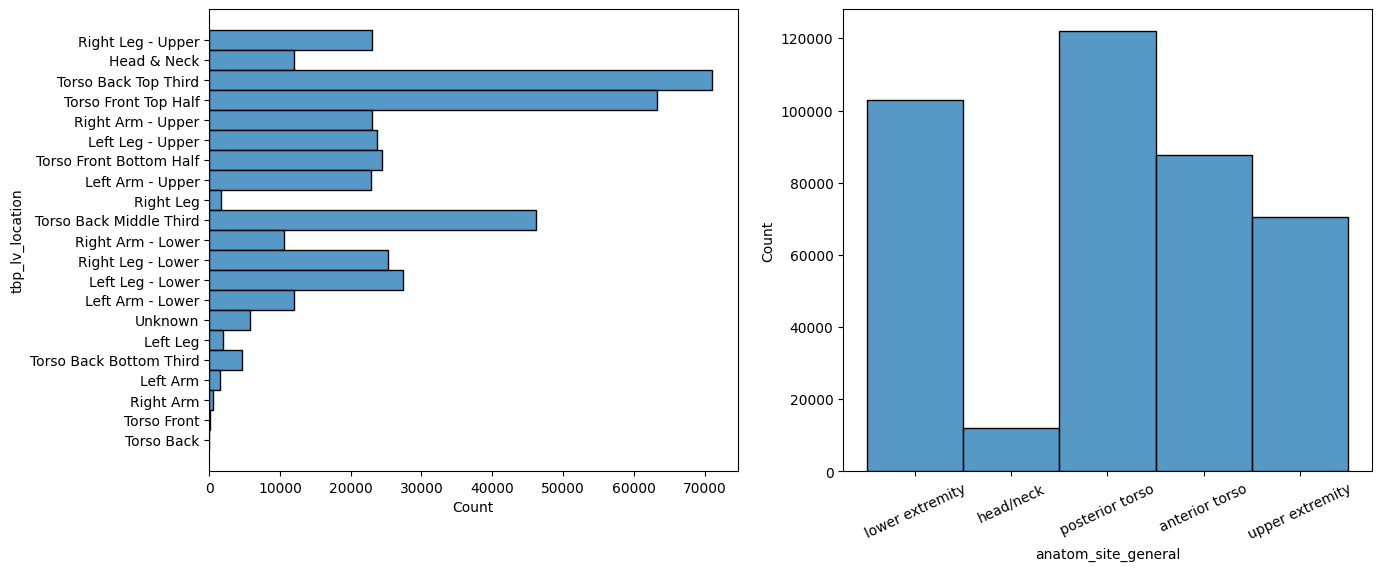

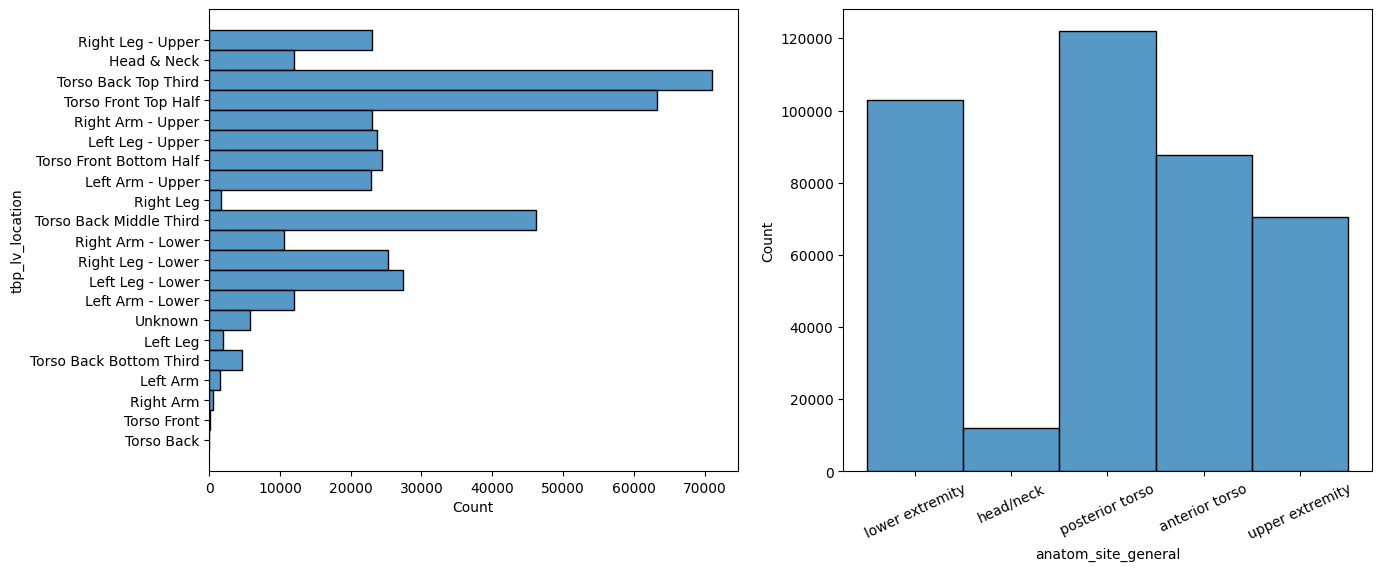

In [5]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.histplot(y = df.tbp_lv_location)

plt.subplot(1,2,2)
sns.histplot(x = df.anatom_site_general)
plt.xticks(rotation = 25)

plt.show(())

### Combine the file url and file name (df['isic_id']) into one new column

In [6]:
# Generate full paths
df['full_path'] = df['isic_id'].apply(lambda i: os.path.join(url, i + ".jpg"))
df.tail(3)

,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,tbp_lv_H,tbp_lv_Hext,tbp_lv_L,tbp_lv_Lext,tbp_lv_areaMM2,tbp_lv_area_perim_ratio,tbp_lv_color_std_mean,tbp_lv_deltaA,tbp_lv_deltaB,tbp_lv_deltaL,tbp_lv_deltaLB,tbp_lv_deltaLBnorm,tbp_lv_eccentricity,tbp_lv_location,tbp_lv_location_simple,tbp_lv_minorAxisMM,tbp_lv_nevi_confidence,tbp_lv_norm_border,tbp_lv_norm_color,tbp_lv_perimeterMM,tbp_lv_radial_color_std_max,tbp_lv_stdL,tbp_lv_stdLExt,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z,attribution,copyright_license,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence,full_path
401056,ISIC_9999960,0,IP_0076153,65.0,female,anterior torso,2.05,TBP tile: close-up,3D: XP,17.332567,12.364397,29.845326,26.500073,34.513206,29.242644,59.854275,64.987196,39.413663,47.840501,2.758491,13.05001,0.498197,4.968169,3.345253,-8.426838,9.267366,7.842607,0.649815,Torso Front Top Half,Torso Front,1.595713,59.947979,1.444499,1.660411,5.999862,0.607554,1.702824,2.205272,0.183099,40,54.622246,1065.263672,-106.83374,"Frazer Institute, The University of Queensland...",CC-BY,IL_9852274,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.999416,/kaggle/input/isic-2024-challenge/train-image/...
401057,ISIC_9999964,0,IP_5231513,30.0,female,anterior torso,2.80,TBP tile: close-up,3D: XP,22.288570,9.564721,28.431200,27.012250,36.126360,28.655640,51.905420,70.501540,49.328490,60.874160,6.023644,13.78763,1.317875,12.723850,1.418951,-11.545660,11.751160,8.515440,0.492929,Torso Front Bottom Half,Torso Front,2.547945,99.319330,1.421536,3.583966,9.113276,1.078204,3.680175,1.957157,0.161850,140,-9.861557,877.527000,-76.98212,University Hospital of Basel,CC-BY-NC,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,/kaggle/input/isic-2024-challenge/train-image/...
401058,ISIC_9999967,0,IP_6426047,50.0,male,lower extremity,3.30,TBP tile: close-up,3D: XP,16.792900,11.434730,21.457220,21.214910,27.247270,24.100320,51.952470,61.675560,26.342490,38.377250,6.905611,14.85677,0.978867,5.358174,0.242311,-12.034770,12.157000,12.033930,0.667850,Left Leg - Lower,Left Leg,2.583116,93.651410,1.883554,3.100943,10.128920,1.088073,3.068755,3.199104,0.197917,45,-258.872300,148.606200,107.71060,"Department of Dermatology, University of Athen...",CC-BY,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.999960,/kaggle/input/isic-2024-challenge/train-image/...


In [7]:
# Ignore it!!
'''num_r = np.random.randint(0, len(df))
path = df['full_path'][num_r]             # 18409 np.random.randint(0, len(df))
print(num_r)

img = cv2.imread(path)
imgrgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gr = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#------------------------------------------------------------------------------------------------------------------------
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(gr)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(clahe_img, (3,3), 0)

# Compute the gradient using Sobel
#gradient = cv2.morphologyEx(blurred, cv2.MORPH_GRADIENT, np.ones((3, 3), np.uint8))

_, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Perform morphological operations to separate foreground and background--------------------------------------------------
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=1)

### Sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=1)

### Sure foreground area using distance transform
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L1, 3)
_, sure_fg = cv2.threshold(dist_transform, 0.3 * dist_transform.max(), 255, 0)


# Unknown region (area between sure foreground and background) -----------------------------------------------------------
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labelling
_, markers = cv2.connectedComponents(sure_fg)
markers[markers == 0] = 1  # Add 1 to ensure the background is not 0
markers[unknown == unknown.max()] = 0  # Mark the unknown region as 0

# Apply the Watershed algorithm
markers = cv2.watershed(imgrgb, markers)

# Mark boundaries on the original image
imgrgb[markers == -1] = [255, 0, 0]  # Boundary in red

# CREATE MASKING  --------------------------------------------------------------------------------------------------------
# Create masks for foreground and background
foreground_mask = np.uint8(markers > 1) * 255  # Foreground (area > 1)
background_mask = np.uint8(markers <= 1) * 255  # Background (area <= 1)
segmented_image = cv2.bitwise_and(imgrgb, imgrgb, mask=foreground_mask)

#-------------------------------------------------------------------------------------------------------------------------
# Plotting
temp = [img ,binary, opening, sure_bg, dist_transform, sure_fg, unknown, markers, imgrgb, 
        foreground_mask, background_mask, segmented_image]
temp1 = ['img' ,'binary', 'opening', 'sure_bg', 'dist_transform', 'sure_fg', 'unknown', 'markers', 
         'Apply the Watershed','foreground_mask', 'background_mask', 'Masking_foreground']
plt.figure(figsize=(20,7))
for i, n in enumerate(temp):
    plt.subplot(2,6,i+1)
    plt.imshow(n, cmap='gray')
    plt.axis('off')
    plt.title(temp1[i])
plt.show()'''

"num_r = np.random.randint(0, len(df))\npath = df['full_path'][num_r]             # 18409 np.random.randint(0, len(df))\nprint(num_r)\n\nimg = cv2.imread(path)\nimgrgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)\ngr = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)\n\n#------------------------------------------------------------------------------------------------------------------------\nclahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))\nclahe_img = clahe.apply(gr)\n\n# Apply Gaussian blur to reduce noise\nblurred = cv2.GaussianBlur(clahe_img, (3,3), 0)\n\n# Compute the gradient using Sobel\n#gradient = cv2.morphologyEx(blurred, cv2.MORPH_GRADIENT, np.ones((3, 3), np.uint8))\n\n_, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)\n\n# Perform morphological operations to separate foreground and background--------------------------------------------------\nkernel = np.ones((3, 3), np.uint8)\nopening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=1)

# Segmentation

## 1. Watershed algorithm

In [8]:
def apply_watershed_algorithm(img):
    img_r = cv2.resize(img, (120,120), interpolation= cv2.INTER_CUBIC)
    imgrgb = cv2.cvtColor(img_r, cv2.COLOR_BGR2RGB)
    
    gr = cv2.cvtColor(imgrgb, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    clahe_img = clahe.apply(gr)




    
    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(clahe_img, (3,3), 0)    
    _, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # Perform morphological operations to separate foreground and background  --------------------------------------------------
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=1)    # Opening
    
    ### Sure background area  
    sure_bg = cv2.dilate(opening, kernel, iterations=1)    # Dilatation
    
    ### Sure foreground area using distance transform  -------------------------------------------------------------------------
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L1, 3)
    _, sure_fg = cv2.threshold(dist_transform, 0.3 * dist_transform.max(), 255, 0)
    
    # Unknown region (area between sure foreground and background) ------------------------------------------------------------
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)




    
    # Marker labelling
    _, markers = cv2.connectedComponents(sure_fg)
    markers[markers == 0] = 1  # Add 1 to ensure the background is not 0
    markers[unknown == 255] = 0  # Mark the unknown region as 0

    # Apply the Watershed algorithm   ----------------------------------------------------------------------------------------- 
    markers = cv2.watershed(imgrgb, markers)

    # Mark boundaries on the original image
    imgrgb[markers == -1] = [255, 0, 0]  # Boundary in red




    
    # CREATE MASKING  --------------------------------------------------------------------------------------------------------
    # Create masks for foreground and background
    foreground_mask = np.uint8(markers > 1) * 255  # Foreground (area > 1)
    #background_mask = np.uint8(markers <= 1) * 255  # Background (area <= 1)
    segmented_image = cv2.bitwise_and(imgrgb, imgrgb, mask=foreground_mask)

    return segmented_image

### Sample

115798


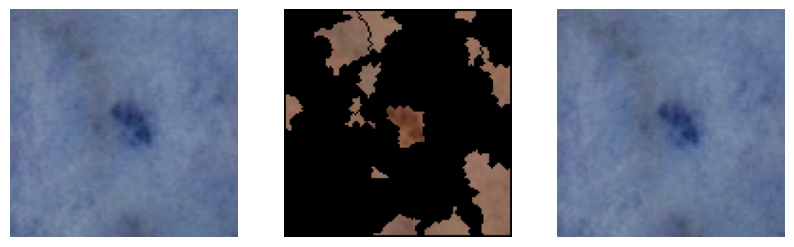

foreground_segmented:  (120, 120, 3)


In [9]:
num_r = np.random.randint(0, len(df))
path = df['full_path'][num_r]             # 18409, 320452, 376081, 47826, 294821 np.random.randint(0, len(df))
print(num_r)

img = cv2.imread(path)
foreground_segmented = apply_watershed_algorithm(img)

temp = [img, foreground_segmented, img]
temp1 = ['img', 'foreground_segmented']
plt.figure(figsize=(10,8))
for i, n in enumerate(temp):
    plt.subplot(1,3,i+1)
    plt.imshow(n, cmap='gray')
    plt.axis('off')
    #plt.title(temp1[i])

plt.show()
print('foreground_segmented: ', foreground_segmented.shape)

## 2. We create a boundary (bounding box) 50% from the center of the image. Then we eliminate objects outside the boundary.

### what happens if i reduce the bright pixels, Can it help us reduce the unnecessary RoI?
- 10% reduction is good, but I'm not sure all images in the dataset can produce a suitable image without removing ROIs containing skin cancer.
- Even in the reduction, there are some images that do not experience any changes at all with the original image

### From the remaining objects, we eliminate them based on the area of ​​each object.
- Choose the maximum area

### Use bitwise_and to combine the inner and outer objects that have been processed.

/tmp/ipykernel_17/1945405036.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  selected_contour = contours[int(contour_object[contour_object.area == contour_object.area.max()].index.values)]


Text(0.5, 1.0, 'combine the inner and outer objects')

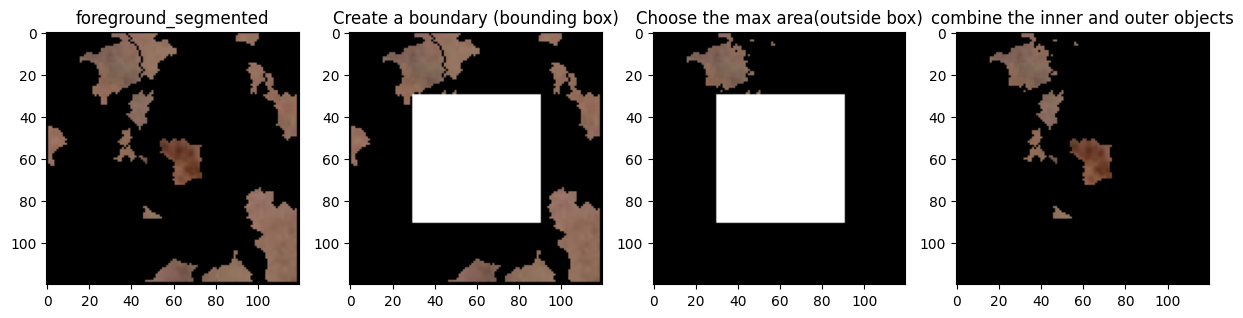

In [10]:
sample = foreground_segmented.copy()
# Create a boundary (bounding box) 50% from the center of the image. --------------------------------------------------------
xy = int(sample.shape[0]//2) - int(sample.shape[0]//2 * 0.5)
wh = int(sample.shape[0]//2) + int(sample.shape[0]//2 * 0.5)
cv2.rectangle(sample, (xy, xy), (wh, wh), (255, 255, 255), thickness=cv2.FILLED)

# Reduce -10% ---------------------------------------------------------------------------------------------------------------
sample1 = sample.copy()
sample1[np.any(sample1 >= int(foreground_segmented.max()*0.9), axis=-1)] = [0, 0, 0]


# Eliminate Object based on the (MAX) area of ​​each object--------------------------------------------------------------------
sample_gr = cv2.cvtColor(sample, cv2.COLOR_BGR2GRAY)
contours, _ = cv2.findContours(sample_gr, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contour_data = []
for i, contour in enumerate(contours):
    # Calculate area and perimeter
    area = cv2.contourArea(contour)
    
    # Append to the list as a dictionary
    contour_data.append({
        #"circularity": circularity_c, "aspect_ratio": aspect_ratio_c, 
        "area":area})


# Convert list of dictionaries to a DataFrame
contour_object = pd.DataFrame(contour_data)

# Choose the maximum area --------------------------------------------------------------------------------------------------
selected_contour = contours[int(contour_object[contour_object.area == contour_object.area.max()].index.values)]

mask = np.zeros_like(sample)
cv2.drawContours(mask, [selected_contour], -1, (255, 255, 255), thickness=cv2.FILLED)
result = cv2.bitwise_and(sample1, mask)

# Use bitwise_and to combine the inner and outer objects that have been processed -------------------------------------------
cv2.rectangle(result, (xy, xy), (wh, wh), (255, 255, 255), thickness=cv2.FILLED)
final_result = cv2.bitwise_and(foreground_segmented, result)


# PLOTTING ------------------------------------------------------------------------------------------------------------------
plt.figure(figsize=(15,7))
plt.subplot(1,4,1)
plt.imshow(foreground_segmented, cmap='gray')
plt.title("foreground_segmented")

plt.subplot(1,4,2)
plt.imshow(sample, cmap='gray')
plt.title("Create a boundary (bounding box)")

plt.subplot(1,4,3)
plt.imshow(result, cmap='gray')
plt.title("Choose the max area(outside box)")

plt.subplot(1,4,4)
plt.imshow(final_result, cmap='gray')
plt.title("combine the inner and outer objects")

In [11]:
def elimination_of_objects_except_in_the_central_area(images):
    sample_for_white_box = images.copy()
    #sample_for_reduce_bright_pixels = images.copy()
    
    # Create a boundary (bounding box) 50% from the center of the image. --------------------------------------------------------
    xy = int(images.shape[0]//2) - int(images.shape[0]//2 * 0.5)
    wh = int(images.shape[0]//2) + int(images.shape[0]//2 * 0.5)
    cv2.rectangle(sample_for_white_box, (xy, xy), (wh, wh), (255, 255, 255), thickness=cv2.FILLED)
    
    # Reduce -10% ---------------------------------------------------------------------------------------------------------------
    # Note: Setelah itu, sample_for_white_box (bermuatan box putih = 255, artinya terhitung sebagai area sama seperti objek lainnya)
    #       maka [box putih (255 pixels)+ objek yang cerah diatas 90%] tersebut kita jadikan hitam (0 pixels)
    sample_for_white_box[np.any(sample_for_white_box >= int(sample_for_white_box.max()*0.9), 
                                axis=-1
                               )] = [0, 0, 0]    # decrease 1 --> 0.9
    



    
    # Eliminate Object based on the (MAX) area of ​​each object--------------------------------------------------------------------
    # Kita HANYA mengeliminasi diluar objek, so kita pakai hasil "sample_for_white_box"
    sample_gr = cv2.cvtColor(sample_for_white_box, cv2.COLOR_BGR2GRAY)
    contours, _ = cv2.findContours(sample_gr, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if not contours:                          # Jika tidak ada kontur ditemukan
        print("No contours detected! Cause there's no objects in outside boundary (bounding box) 50% from the center of the image")
        return images

    


    
    contour_data = []
    for i, contour in enumerate(contours):
        # Calculate area and perimeter
        area = cv2.contourArea(contour)
        
        # Append to the list as a dictionary
        contour_data.append({
            #"circularity": circularity_c, "aspect_ratio": aspect_ratio_c, 
            "area":area})
    
    # Convert list of dictionaries to a DataFrame
    contour_object = pd.DataFrame(contour_data)
    
    # Choose the MAXimum area --------------------------------------------------------------------------------------------------
    selected_contour = contours[int(contour_object[contour_object.area == contour_object.area.max()].index.values)]




    
    # Setelah dapat Contour Max Area, plotting pada MASK (citra kosong berdimensi = images) ------------------------------------
    mask = np.zeros_like(images)
    cv2.drawContours(mask, [selected_contour], -1, (255, 255, 255), thickness=cv2.FILLED)
    result = cv2.bitwise_and(sample_for_white_box, mask)
    
    # Use bitwise_and to combine the inner and outer objects that have been processed -------------------------------------------
    cv2.rectangle(result, (xy, xy), (wh, wh), (255, 255, 255), thickness=cv2.FILLED)
    final_result = cv2.bitwise_and(images, result)


    return final_result

### Sample

/tmp/ipykernel_17/4280198882.py:48: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  selected_contour = contours[int(contour_object[contour_object.area == contour_object.area.max()].index.values)]


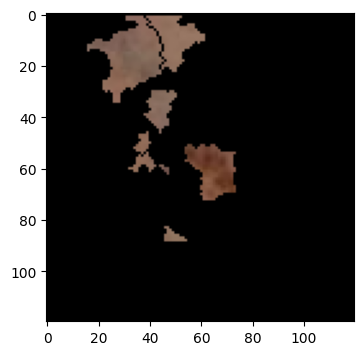

In [12]:
# PLOTTING SAMPLE------------------------------------------------------------------------------------------------------------------
plt.figure(figsize=(4,4))
final_result = elimination_of_objects_except_in_the_central_area(foreground_segmented)
plt.imshow(final_result)
plt.show()

In [13]:
final_result.shape

(120, 120, 3)

# Draw a bounding box from the **Final Segmentation Result**. 

In [14]:
def bounding_box_for_object(original_img, final_result_from_segmentation=None):
    img_r = cv2.resize(original_img, (120,120), interpolation= cv2.INTER_CUBIC)

    if final_result_from_segmentation is not None:
        img_rgb = cv2.cvtColor(img_r, cv2.COLOR_BGR2RGB)
        
        grgr = cv2.cvtColor(final_result, cv2.COLOR_BGR2GRAY)
        contours, _ = cv2.findContours(grgr, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(img_rgb, (x, y), (x + w, y + h), (0, 255, 0), 1)
    
        return img_rgb

    else:
        print('final_result_from_segmentation notDetected !!!')
        return None

### Sample

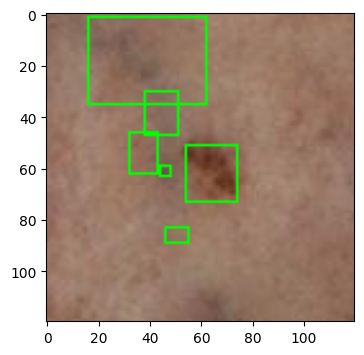

In [15]:
# PLOTTING SAMPLE------------------------------------------------------------------------------------------------------------------
plt.figure(figsize=(4,4))
img_box = bounding_box_for_object(img, final_result)
plt.imshow(img_box)
plt.show()

### Let me test my object detection using segmentation (Watershed algorithm)

/tmp/ipykernel_17/4280198882.py:48: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  selected_contour = contours[int(contour_object[contour_object.area == contour_object.area.max()].index.values)]


No contours detected! Cause there's no objects in outside boundary (bounding box) 50% from the center of the image
No contours detected! Cause there's no objects in outside boundary (bounding box) 50% from the center of the image


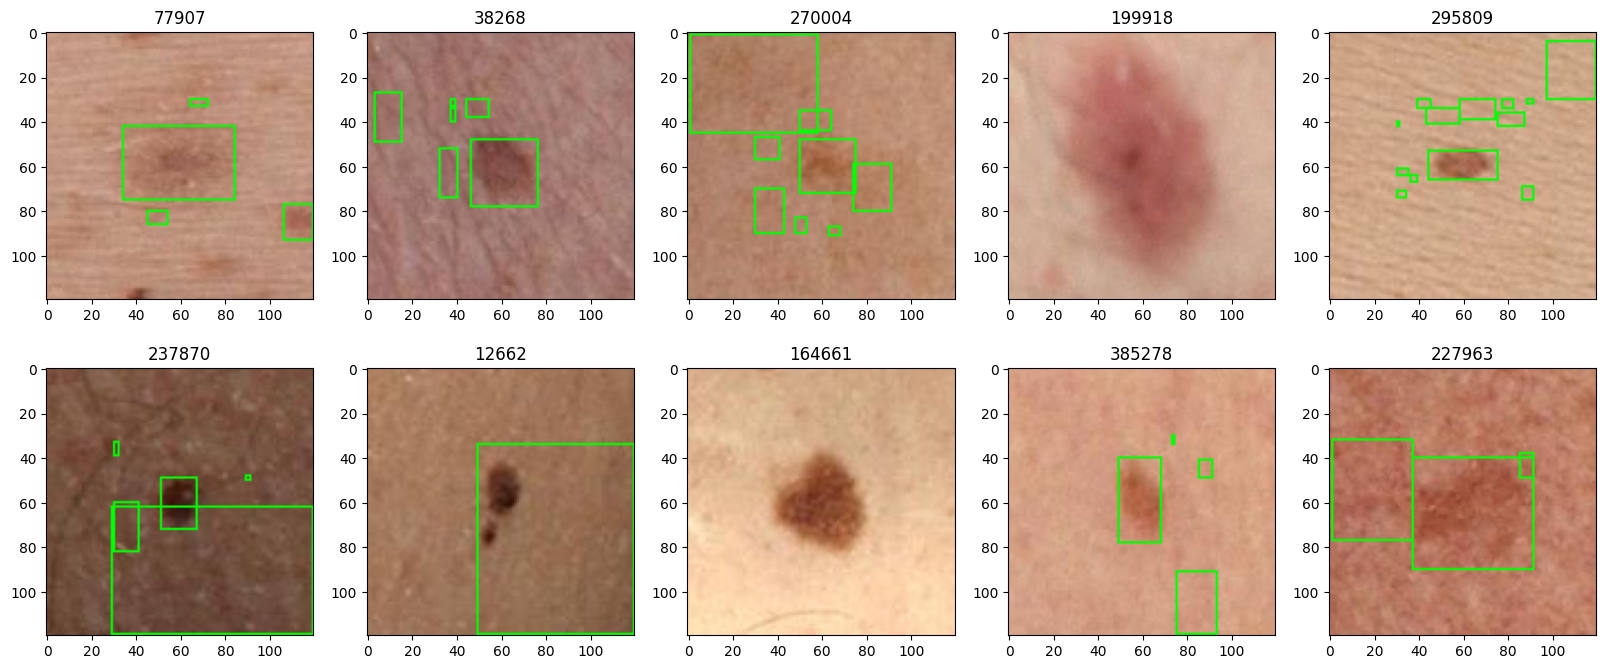

In [16]:
num_r = np.random.randint(0, len(df), 10)

plt.figure(figsize=(20,8))
for i, n in enumerate(num_r):
    path = df['full_path'][n] 
    
    img = cv2.imread(path)
    foreground_segmented = apply_watershed_algorithm(img)
    final_result = elimination_of_objects_except_in_the_central_area(foreground_segmented)
    img_box = bounding_box_for_object(img, final_result)

    plt.subplot(2,5,i+1)
    plt.imshow(img_box)
    plt.title(n)
    
plt.show()

# Additional (optional)
### Analyze the pixel intensities of the foreground mask (excluding the background pixels)

In [17]:
'''# Plot the histogram of foreground pixel intensities
plt.figure(figsize=(8,5))
sns.histplot(x=final_result[final_result > 0], bins=final_result.max()//4, kde=True, color='blue')
plt.axhline(y=final_result.mean(), color='r', linestyle='-')

plt.title("Histogram of Foreground Pixel Intensities")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()'''

'# Plot the histogram of foreground pixel intensities\nplt.figure(figsize=(8,5))\nsns.histplot(x=final_result[final_result > 0], bins=final_result.max()//4, kde=True, color=\'blue\')\nplt.axhline(y=final_result.mean(), color=\'r\', linestyle=\'-\')\n\nplt.title("Histogram of Foreground Pixel Intensities")\nplt.xlabel("Pixel Intensity")\nplt.ylabel("Frequency")\nplt.show()'

# If you found my Notebook helpful or learned something new, please consider supporting me by upvoting. Thank you for your support! ❤️